In [3]:
# Cài đặt thư viện cần thiết
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [4]:
#1 Nhập dữ liệu đầu vào
with open ('adult.data.csv') as f:
    df = pd.read_csv(f, sep=",")

In [19]:
# Hiển thị thông tin
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 1 columns):
 #   Column                                                                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                                                                       --------------  ----- 
 0   age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income  32561 non-null  object
dtypes: object(1)
memory usage: 254.5+ KB


In [5]:
# 2. TIỀN XỬ LÝ DỮ LIỆU

In [10]:
# Xoá dòng dữ liệu trống
df = df[df.age != '?']
df = df[df.workclass != '?']
df = df[df.fnlwgt != '?']
df = df[df.education != '?']
df = df[df['education-num'] != '?']
df = df[df['marital-status'] != '?']
df = df[df.occupation != '?']
df = df[df.relationship != '?']
df = df[df.race != '?']
df = df[df.sex != '?']
df = df[df['capital-gain'] != '?']
df = df[df['capital-loss'] != '?']
df = df[df['hours-per-week'] != '?']
df = df[df['native-country'] != '?']
df = df[df.income != '?']

In [12]:
# Tìm dữ liệu '?' còn sót ?
df[df.age == "?"]
df[df.workclass == "?"]
df[df.fnlwgt == "?"]
df[df.education == "?"]
df[df['education-num'] == "?"]
df[df['marital-status'] == "?"]
df[df.occupation == "?"]
df[df.relationship == "?"]
df[df.race == "?"]
df[df.sex == "?"]
df[df['capital-gain'] == "?"]
df[df['capital-loss'] == "?"]
df[df['hours-per-week'] == "?"]
df[df['native-country'] == "?"]
df[df.income == "?"]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [ ]:
# ==> Không còn dòng chứa dữ liệu '?'

In [14]:
# Xoá cột 'fnlwgt'
df.drop(columns=['fnlwgt'])

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [17]:
# nối train-test
test = pd.read_csv('adult.data.csv')
train = pd.read_csv('adult.test.csv')
df = pd.concat([test.assign(ind="test"), train.assign(ind="train")])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       48842 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  int64  
 5   marital-status  48842 non-null  object 
 6   occupation      48842 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  int64  
 11  capital-loss    48842 non-null  int64  
 12  hours-per-week  48842 non-null  int64  
 13  native-country  48842 non-null  object 
 14  income          48842 non-null  object 
 15  ind             48842 non-null  object 
dtypes: float64(1), int64(5), object(10)
memory usage: 6.3+ MB


In [16]:
# 3. KHẢO SÁT ĐỘ TƯƠNG ĐỒNG GIỮA CÁC CỘT VỚI NHAU BẰNG CÔNG THỨC PEARSON

<AxesSubplot:>

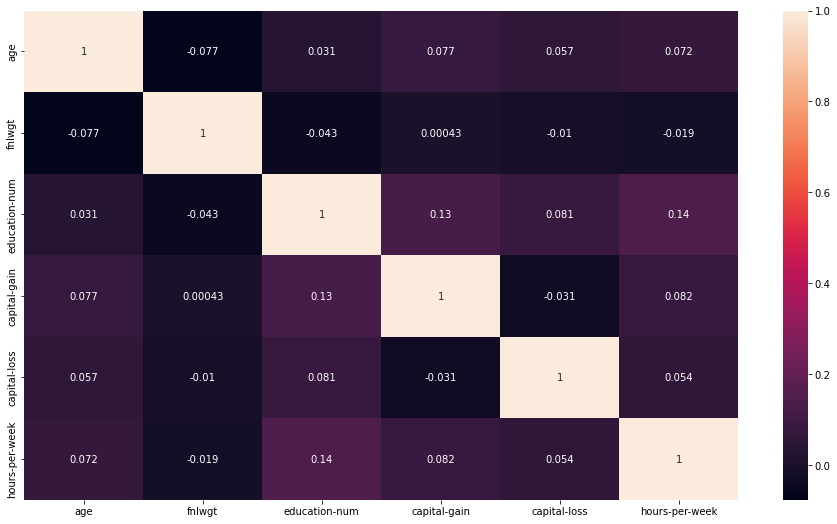

In [22]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(method='pearson'), annot=True)

In [23]:
# 4. TÁCH CÁC CỘT DỮ LIỆU THÀNH 2 PHẦN:
# - 1 PHẦN CHỨA CÁC THUỘC TÍNH BÌNH THƯỜNG
# - 1 PHẦN CHỨA CÁC THUỘC TÍNH QUYẾT ĐỊNH

In [25]:
features = df.drop('income', axis=1)
labels = df['income']

In [28]:
# 5. CHUYỂN ĐỔI CÁC CỘT KHÔNG PHẢI DẠNG SỐ VỀ DẠNG ONE-HOT VECTOR

In [29]:
features.select_dtypes(exclude=['int64']).columns

Index(['workclass', 'fnlwgt', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'ind'],
      dtype='object')

In [30]:
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
features_onehot

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,ind_test,ind_train
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,53,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,28,13,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,13,0,0,36,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
16277,64,9,0,0,40,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
16278,38,13,0,0,50,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
16279,44,13,5455,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [31]:
# 6. TÁCH CÁC DÒNG DỮ LIỆU THÀNH 2 PHẦN HUẤN LUYỆN VÀ KIỂM THỬ

In [34]:
X_train = features_onehot[:30162]
X_test = features_onehot[30162:]
y_train = labels[:30162]
y_test = labels[30162:]

In [35]:
#7. XÂY DỰNG CÂY HUẤN LUYỆN

In [36]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
# Train Decision Tree Classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [39]:
# Predict the response fot test dataset
tree_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Accuracy: 0.8423982869379015
Report:               precision    recall  f1-score   support

       <=50K       0.88      0.91      0.90     14230
        >50K       0.69      0.62      0.65      4450

    accuracy                           0.84     18680
   macro avg       0.79      0.76      0.77     18680
weighted avg       0.84      0.84      0.84     18680



In [41]:
# Tính toán ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.8423982869379015')

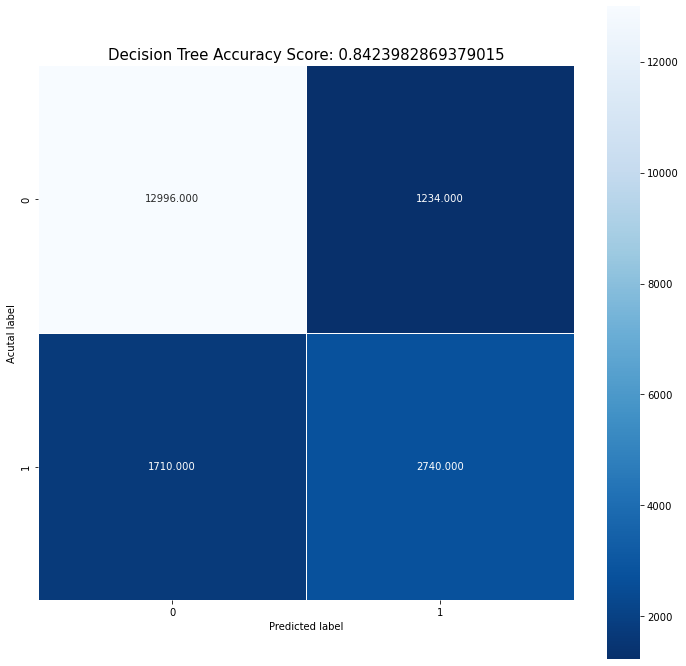

In [43]:
# Biểu diễn lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Acutal label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size=15)

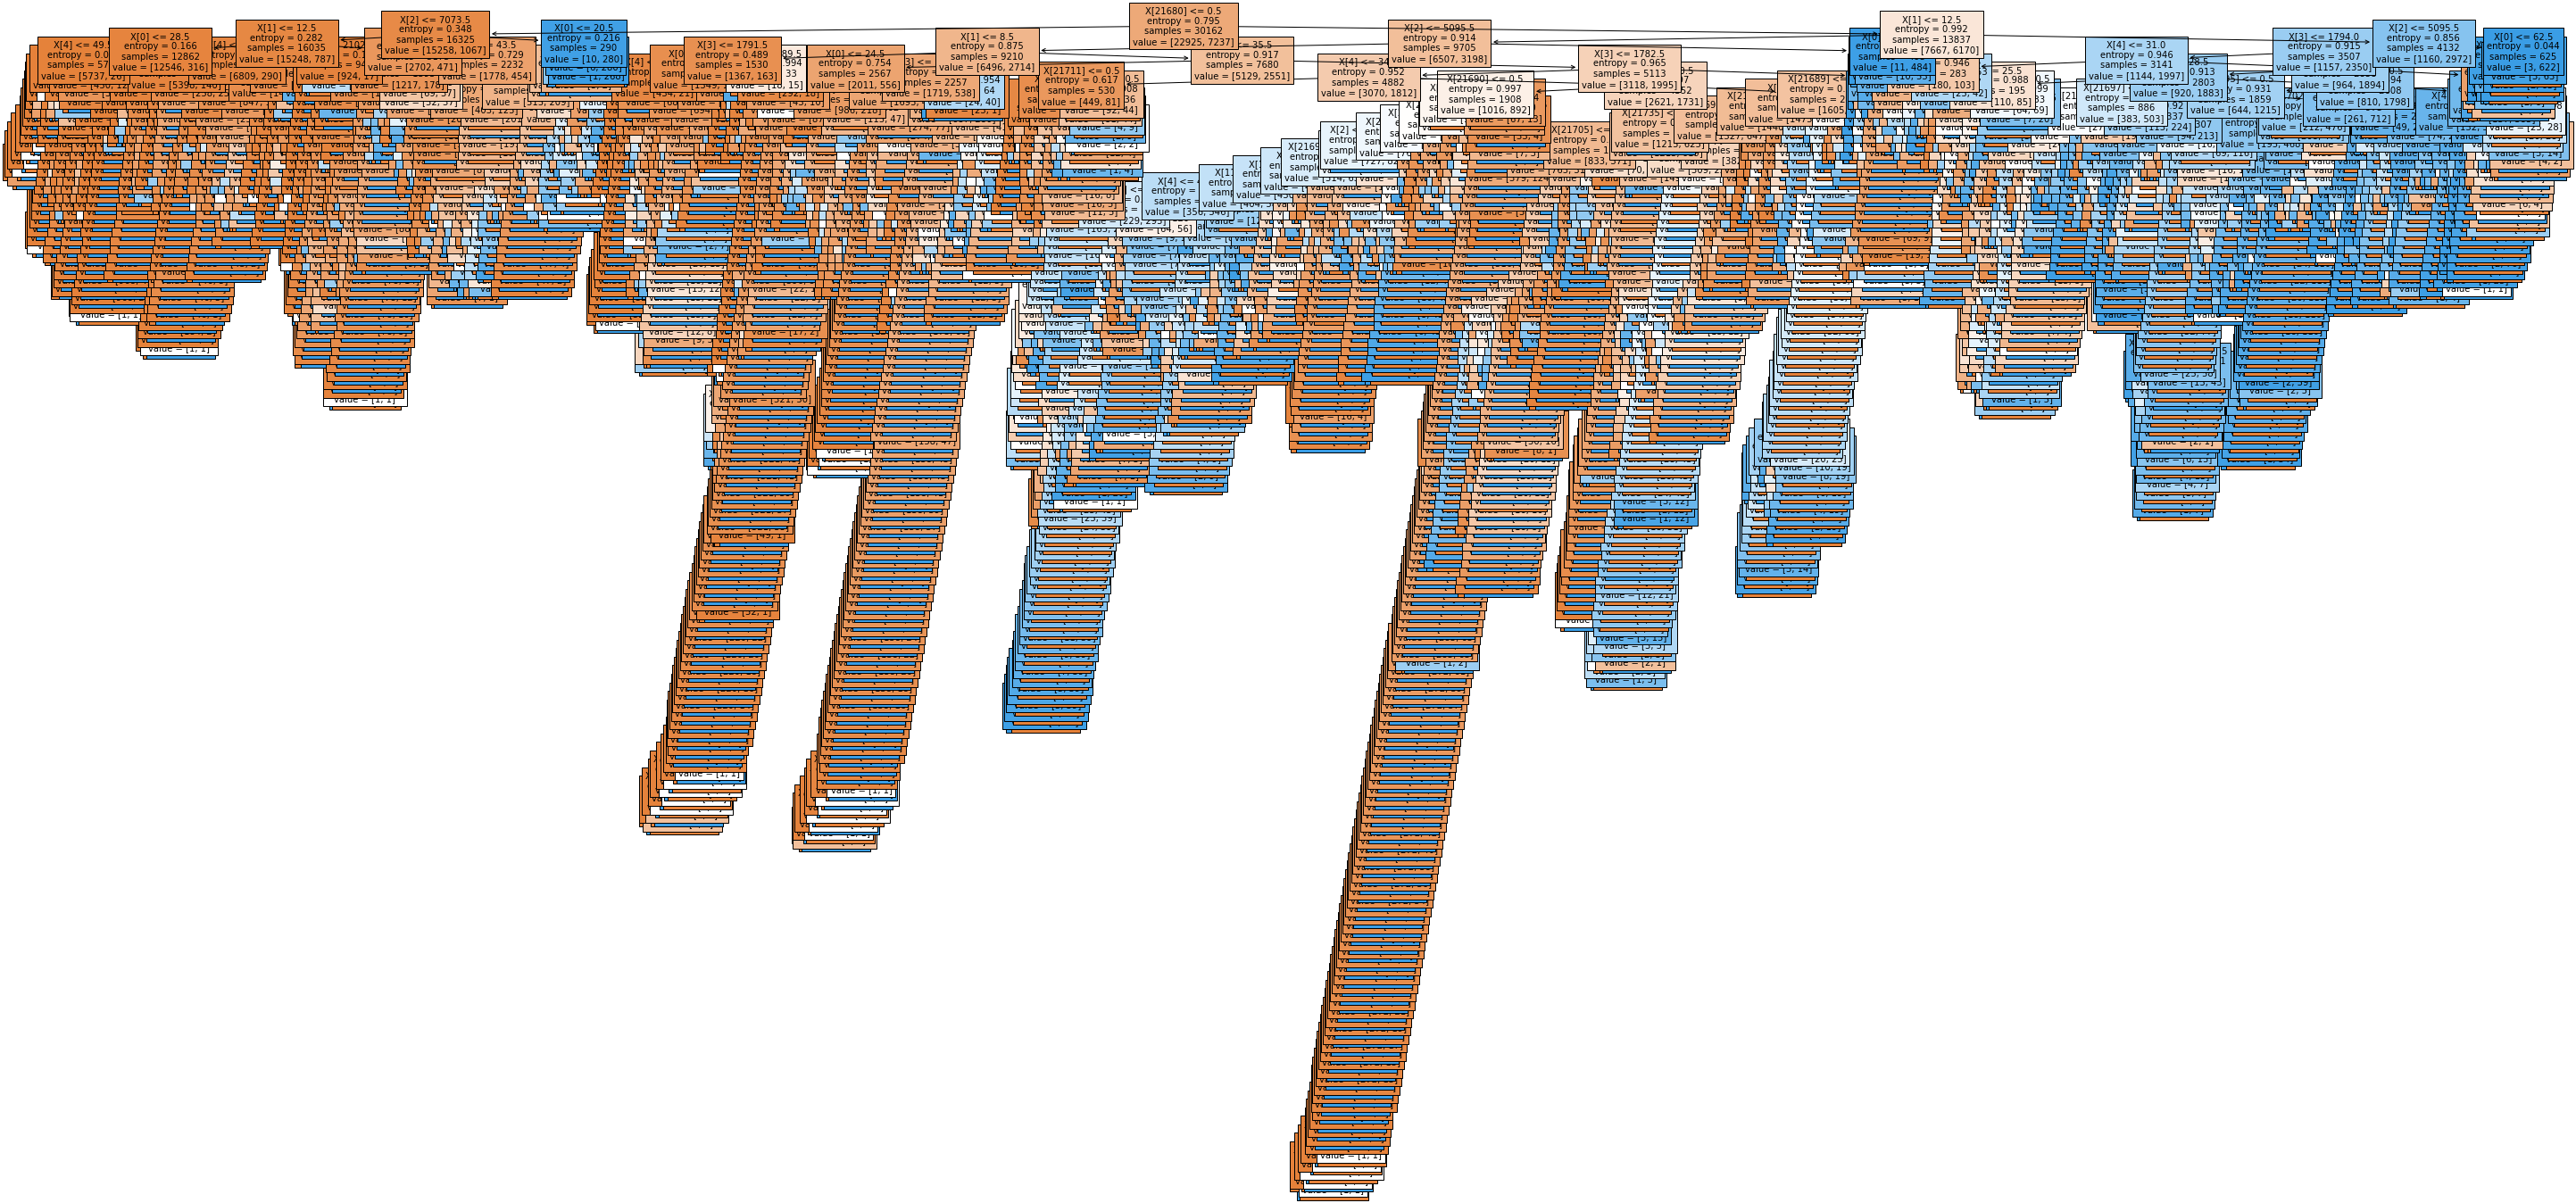

In [45]:
# Cách 2
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree', dpi=100)
plt.show()

In [46]:
# criterion='gini'
clf = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
# Train Decision Tree Classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [47]:
# Predict the response fot test dataset
tree_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Accuracy: 0.8489293361884368
Report:               precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90     14230
        >50K       0.71      0.61      0.66      4450

    accuracy                           0.85     18680
   macro avg       0.80      0.77      0.78     18680
weighted avg       0.84      0.85      0.84     18680



In [48]:
# Tính toán ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.8489293361884368')

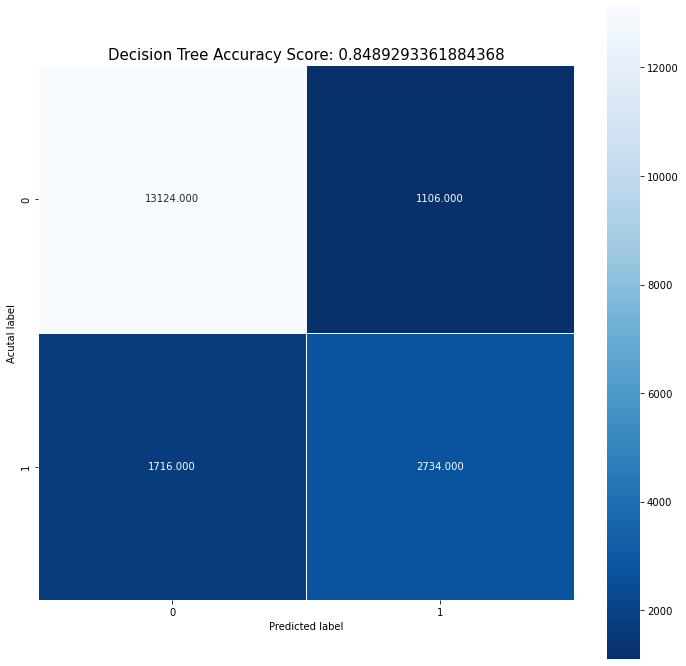

In [49]:
# Biểu diễn lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Acutal label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size=15)

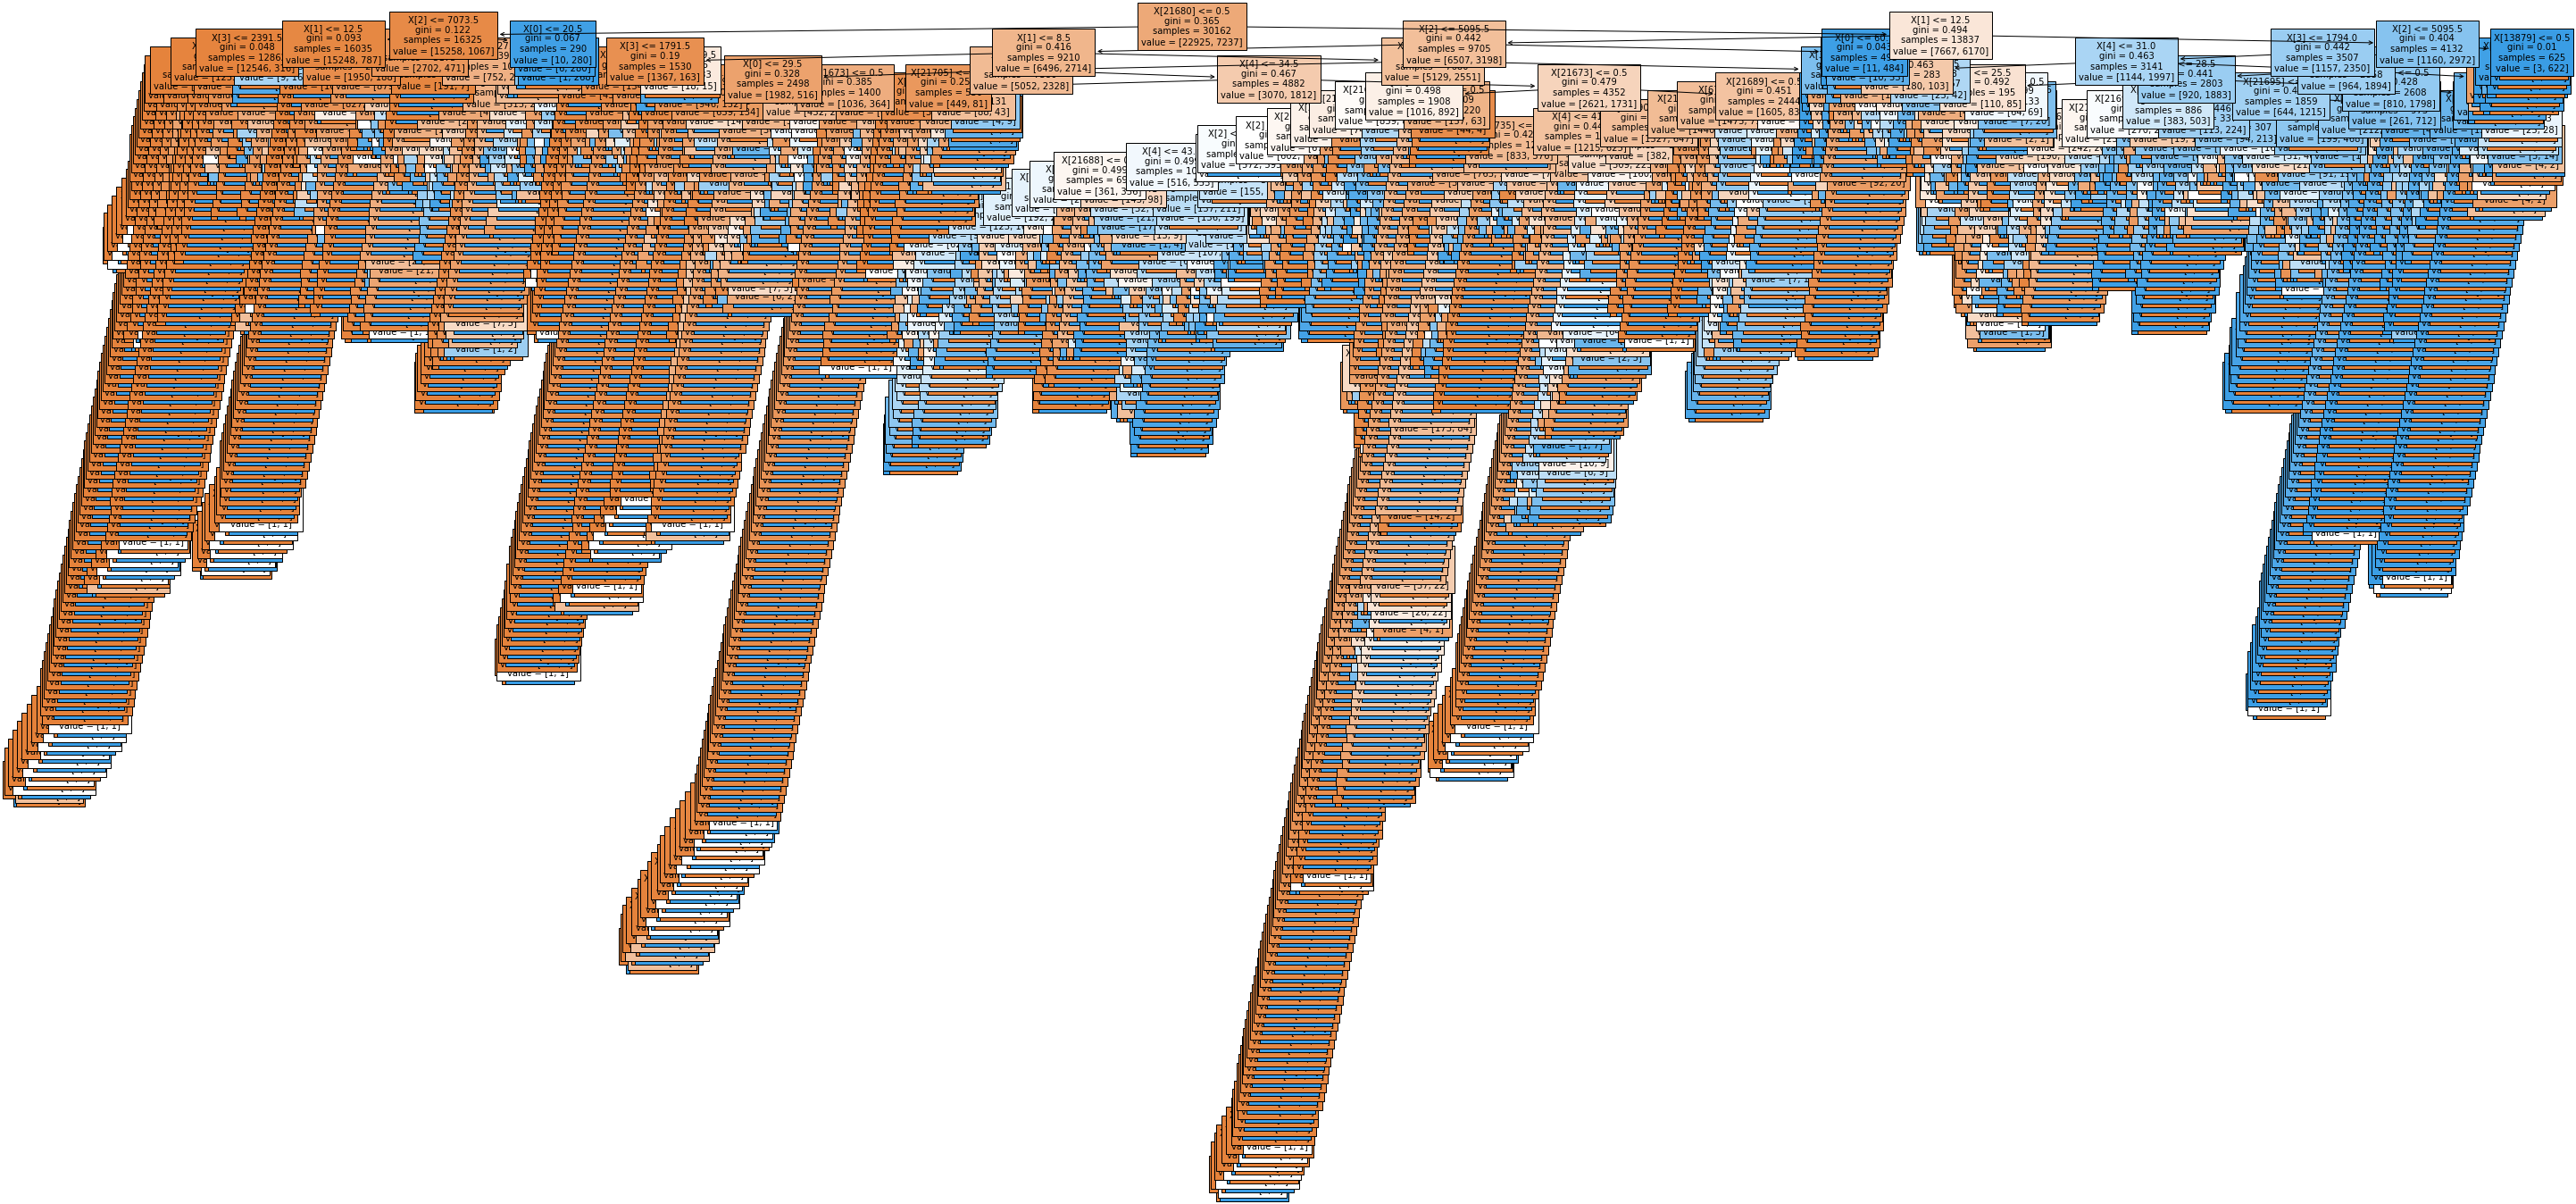

In [50]:
# Cách 2
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree', dpi=100)
plt.show()

In [51]:
#9. XÂY DỰNG MÔ HÌNH PHÂN LỚP BẰNG NAIVE BAYES

In [52]:
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

In [54]:
# Model Accuracy how often is the classifier correct?
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy:", bayes_score)
print("Report:", metrics.classification_report(y_test, bayes_pred))

Accuracy: 0.803372591006424
Report:               precision    recall  f1-score   support

       <=50K       0.94      0.80      0.86     14230
        >50K       0.56      0.82      0.67      4450

    accuracy                           0.80     18680
   macro avg       0.75      0.81      0.76     18680
weighted avg       0.85      0.80      0.81     18680



Text(0.5, 1.0, 'Naive Bayes Accuracy Score: 0.803372591006424')

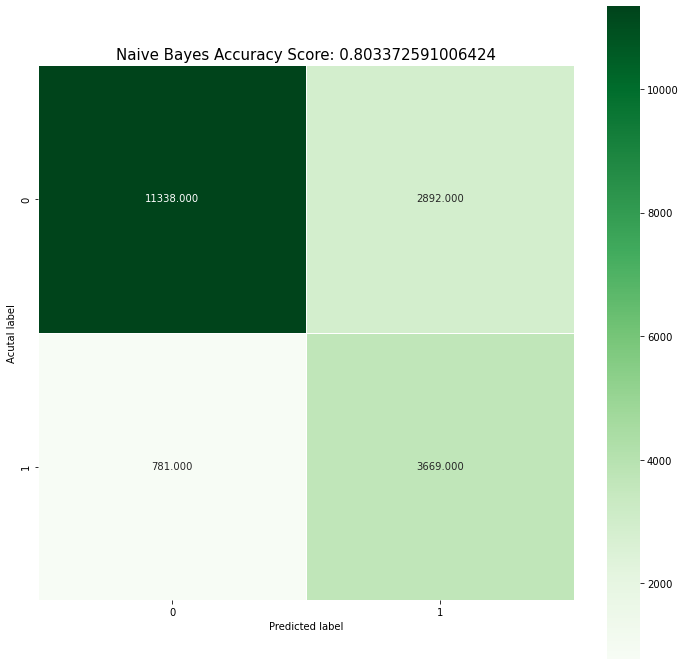

In [55]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)

plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Greens');
plt.ylabel('Acutal label');
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title, size=15)